In [2]:
# Import the necessary packages and modules
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import scipy.misc
import matplotlib.pyplot as plt


# IMPORTING IMAGE USING SCIPY AND TAKING R,G,B COMPONENTS
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
a = imread("HansRosling.jpg")
a_np = np.array(a)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def comp_2d(image_2d): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA
	cov_mat = image_2d - np.mean(image_2d , axis = 1)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
	numpc =80 # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d, axis = 1).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
	recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
	return recon_img_mat 

a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r), comp_2d(a_g), comp_2d(a_b) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = Image.fromarray(recon_color_img)

plt.rcParams['figure.figsize']=[16,8]
recon_color_img.save("C:\\Users\\ASUS\\Desktop\\HansRoslingNew.jpeg")
plt.show()

recon_color_img.size


ValueError: operands could not be broadcast together with shapes (499,500) (499,) 

In [15]:
cov_mat = a_b - np.mean(a_b , axis = 1)
eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
idx = np.argsort(eig_val)
idx = idx[::-1]
eig_vec = eig_vec[:,idx]
eig_val = eig_val[idx]
x = np.linspace(0, 479, 480)

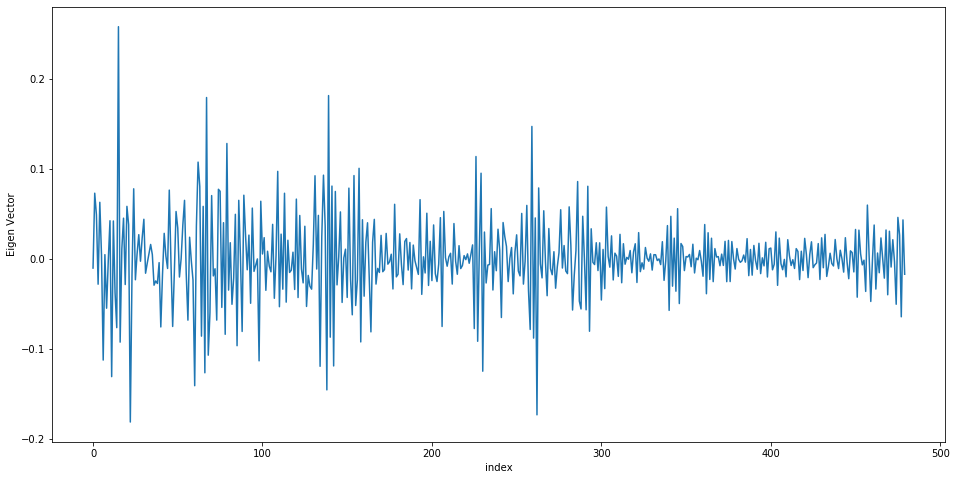

In [16]:
plt.plot(x,eig_vec[:,420])
plt.xlabel('index')
plt.ylabel('Eigen Vector')
# Show the plot
plt.show()

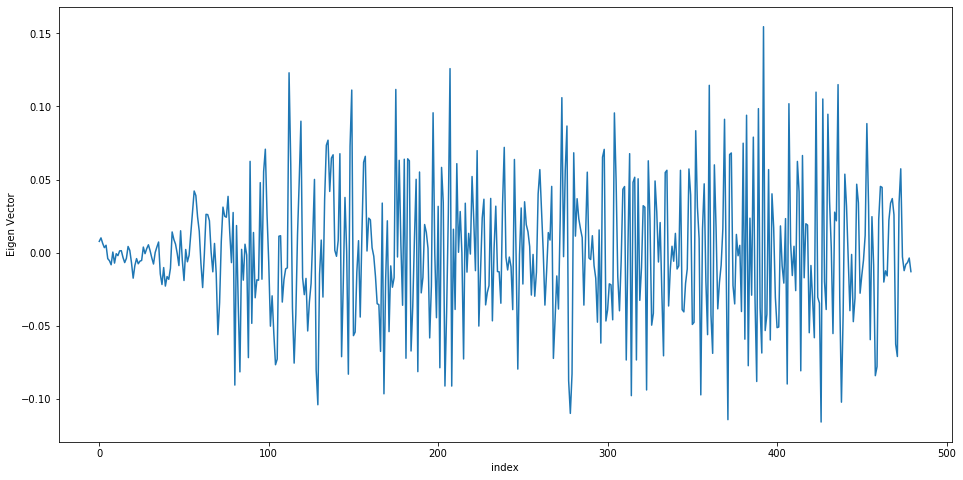

In [18]:
plt.plot(x,eig_vec[:,180], label='Eigen Vector')
plt.xlabel('index')
plt.ylabel('Eigen Vector')
# Show the plot
plt.show()

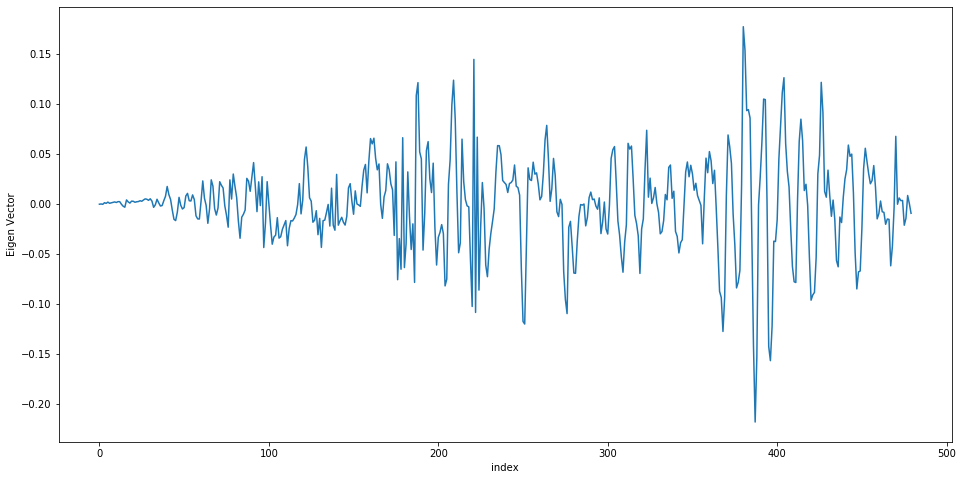

In [19]:
plt.plot(x,eig_vec[:,50], label='')
plt.xlabel('index')
plt.ylabel('Eigen Vector')
# Show the plot
plt.show()

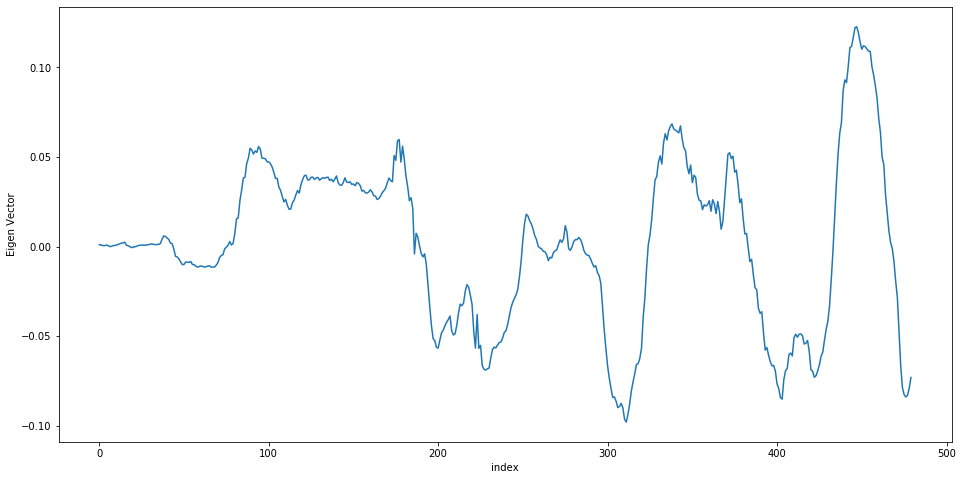

In [20]:
plt.plot(x,eig_vec[:,5], label='')
plt.xlabel('index')
plt.ylabel('Eigen Vector')
# Show the plot
plt.show()

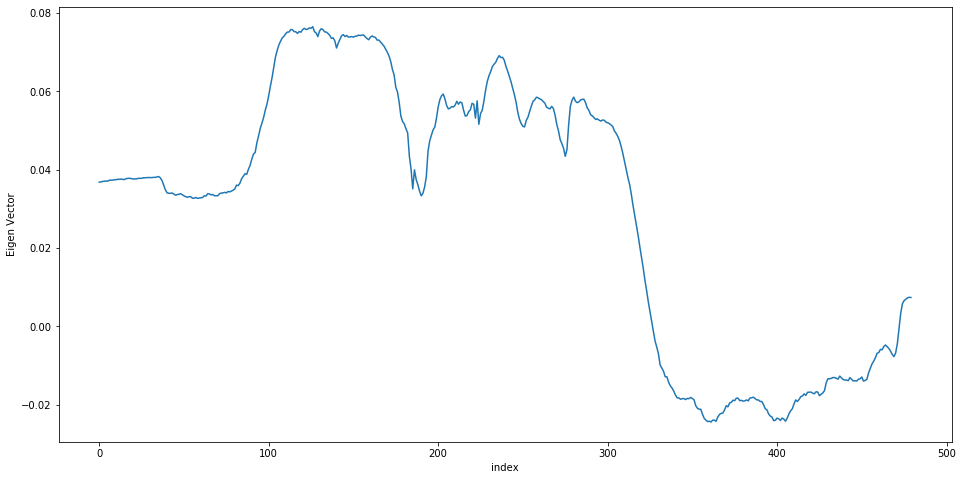

In [21]:
plt.plot(x,eig_vec[:,0], label='')
plt.xlabel('index')
plt.ylabel('Eigen Vector')
# Show the plot
plt.show()